In [1]:
# This notebook illustrates handling the July 2024 Demo of the 6mo Hackathon Scenario 2, described at: 

SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet","mira")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR, "models", "BIOMD0000000955_askenet.json"
)
REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "requests", "BIOMD0000000955_askenet_request.json"
)


# %load_ext autoreload
# %autoreload 2

In [2]:


# N = "Total_population"
STATES = ["Susceptible", "Healed", "Infected", "Recognized", "Extinct", "Diagnosed", "Ailing", "Threatened"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=10

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
    # funman_request.structure_parameters[0].schedules= []
    # for t in range(0, MAX_TIME, STEP_SIZE):
    #     funman_request.structure_parameters[0].schedules.append(EncodingSchedule(timepoints=list(range(0, t+STEP_SIZE, STEP_SIZE))))
    

    # # funman_request.config.substitute_subformulas = True
    # # funman_request.config.use_transition_symbols = True
    # funman_request.config.use_compartmental_constraints=True
    # funman_request.config.save_smtlib="./out"
    funman_request.config.tolerance = 0.05
    # funman_request.config.verbosity = 20
    # funman_request.config.dreal_log_level = "info"

    # factor = 1.6 
    to_synthesize = ["theta", "epsilon"]
    # keep_constant = ["p_Vax_UnVax", "p_UnVax_Vax"]
    # for p in [po for po in funman_request.parameters if po.name not in keep_constant # if po.name  in to_synthesize
    # ]:
    #     param = funman_request.parameter(p.name)
    #     param.interval.lb = max(p.interval.lb-factor, 0)
    #     param.interval.ub = min(p.interval.ub+factor, max(1, p.interval.ub+factor))
    #     # param.label = "all" if p.name in to_synthesize else "any"
    #     param.label = "any"
    #     print(param)

    # # Susceptible is decreasing,  dS/dt <= 0, S_{t+1} - S_t <= 0
    # c1 = LinearConstraint(name="c1", additive_bounds=Interval(ub=0, closed_upper_bounds=True), variables=["Susceptible"], derivative=True)
    # funman_request.constraints.append(c1)

    # # # R is increasing, dR/dt >= 0,   R_{t+1} - R_t >= 0
    # c2 = LinearConstraint(name="c2", additive_bounds=Interval(lb=0), variables=["Recovered"], derivative=True)
    # funman_request.constraints.append(c2)

    # # # D is increasing, dD/dt >= 0, dD/dt >= 0,   D_{t+1} - D_t >= 0
    # c3 = LinearConstraint(name="c3", additive_bounds=Interval(lb=0), variables=["Deceased"], derivative=True)
    # funman_request.constraints.append(c3)

    # # # Population size maintained
    # # c4 = LinearConstraint(name="compartment", additive_bounds=Interval(lb=0, ub=0, closed_upper_bound=True), variables=COMPARTMENTS, weights=[1, 1, 1, 1, 1, -1])
    # # funman_request.constraints.append(c4)

    # # # Infected peak
    # # c5 = LinearConstraint(name="Infected_peak", additive_bounds=Interval(lb=50), variables=["Infected"], timepoints=Interval(lb=40, ub=40, closed_upper_bound=True))
    # # funman_request.constraints.append(c5)

    # # for sv in STATES:
    # #     funman_request.constraints.append(StateVariableConstraint(name=f"{sv}_bounds", variable=sv, interval=Interval(lb=0, ub=100, closed_upper_bound=True)))
    

    


    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIDARTHE Hackathon 6mo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

Automatic initialization of gaol... done


2024-07-05 19:52:57,415 - funman.api.run - INFO - Dumping results to ./out/8eac5278-2de4-4e3d-83d4-25b0ab22a747.json
2024-07-05 19:53:03,568 - funman.representation.box - INFO - Split[[0.00000, 7.00000]](epsilon[(0.09, 0.1475)][(0.1475, 0.175)])
2024-07-05 19:53:03,570 - funman.representation.box - INFO - widths: 0.10000 -> 0.10000 0.22800 (raw), 1.00000 -> 1.00000 1.00000 (norm)
2024-07-05 19:53:03,574 - funman.search.box_search - INFO - progress: 0.00000
2024-07-05 19:56:59,349 - funman.api.run - INFO - Dumping results to ./out/8eac5278-2de4-4e3d-83d4-25b0ab22a747.json
2024-07-05 19:56:59,360 - funman.search.box_search - ERROR - Traceback (most recent call last):
  File "/root/funman/src/funman/search/box_search.py", line 1141, in _expand
    ) = self._get_false_points(
  File "/root/funman/src/funman/search/box_search.py", line 821, in _get_false_points
    points, explanation = self._get_points(
  File "/root/funman/src/funman/search/box_search.py", line 793, in _get_points
    res

IndexError: list index out of range

2024-07-03 16:30:05,886 - funman.server.worker - INFO - FunmanWorker running...
2024-07-03 16:30:05,892 - funman.server.worker - INFO - Starting work on: 85e604ac-9fb9-4b64-8c6c-800a58628ed7
2024-07-03 16:30:05,978 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 10, 20]
2024-07-03 16:30:05,981 - funman_dreal.solver - DEBUG - Created new Solver ...
2024-07-03 16:30:06,011 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 10


name='beta' interval={'lb': 0, 'ub': 1.8330000000000002, 'closed_upper_bound': True, 'original_width': 0.0, 'normalized': False, 'unnormalized_lb': None, 'unnormalized_ub': None} label='any'
name='epsilon' interval={'lb': 0, 'ub': 1.3333333333333335, 'closed_upper_bound': True, 'original_width': 0.0, 'normalized': False, 'unnormalized_lb': None, 'unnormalized_ub': None} label='any'
name='gamma' interval={'lb': 0, 'ub': 1.125, 'closed_upper_bound': True, 'original_width': 0.0, 'normalized': False, 'unnormalized_lb': None, 'unnormalized_ub': None} label='any'
name='alpha' interval={'lb': 0, 'ub': 1.006, 'closed_upper_bound': True, 'original_width': 0.0, 'normalized': False, 'unnormalized_lb': None, 'unnormalized_ub': None} label='any'
name='lambda' interval={'lb': 120479.0, 'ub': 120481.0, 'closed_upper_bound': True, 'original_width': 0.0, 'normalized': False, 'unnormalized_lb': None, 'unnormalized_ub': None} label='any'
name='mu' interval={'lb': 0, 'ub': 1.012048, 'closed_upper_bound': 

2024-07-03 16:30:06,112 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 10 to 20
2024-07-03 16:30:06,554 - funman.scenario.consistency - INFO - 2{20}:	[+]
2024-07-03 16:30:06,558 - funman.server.worker - INFO - Completed work on: 85e604ac-9fb9-4b64-8c6c-800a58628ed7
2024-07-03 16:30:07,895 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2024-07-03 16:30:08,064 - funman.server.worker - INFO - FunmanWorker exiting...
2024-07-03 16:30:08,067 - funman.server.worker - INFO - Worker.stop() completed.


Total # of ibex-fwdbwd Pruning                @ Pruning level        =             549
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =             353
Total time spent in Pruning                   @ Pruning level        =        0.001101 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =              26
Total time spent in Converting                @ Ibex Converter       =        0.000563 sec


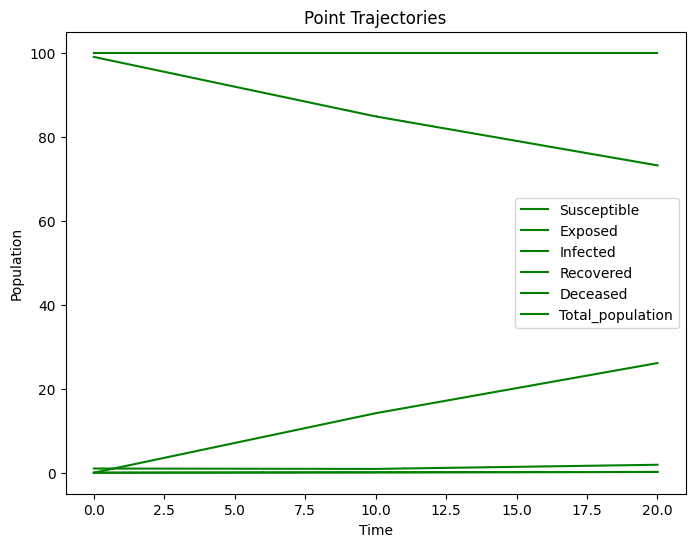

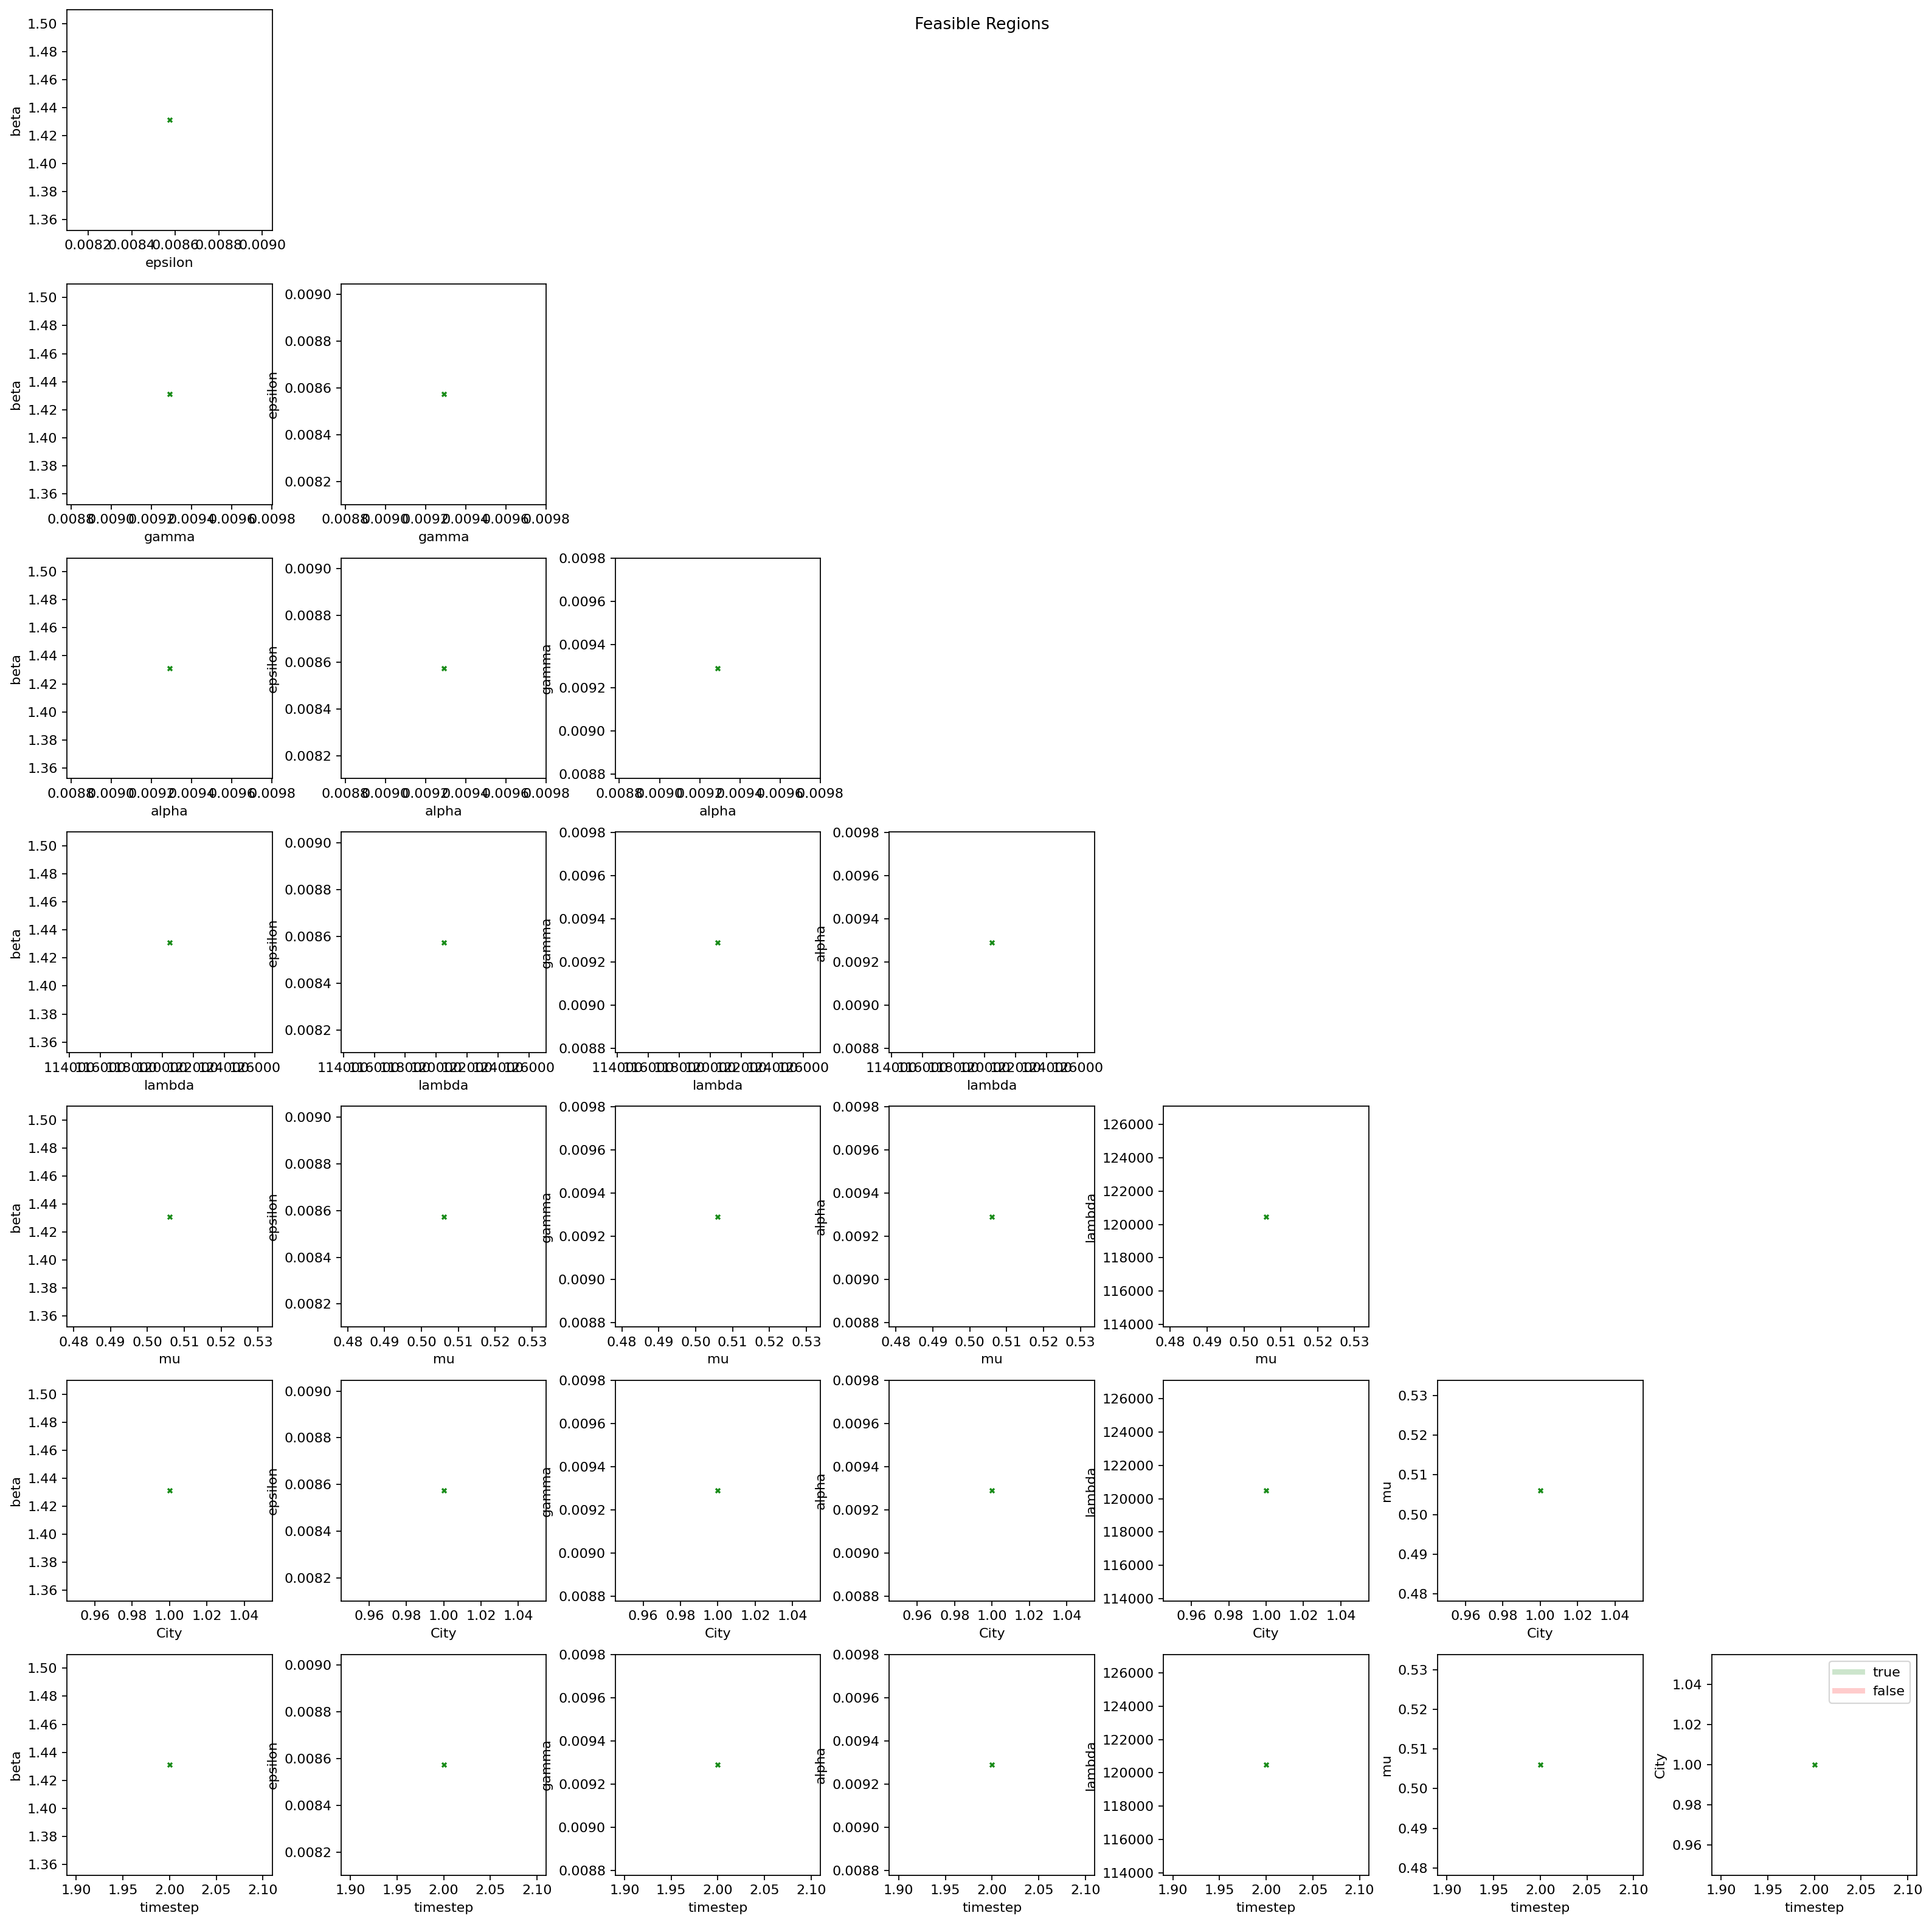

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0, 1.8330000000000002): 1.4310981325254257, epsilon[0, 1.3333333333333335): 0.008574051535771645, gamma[0, 1.125): 0.009290367946363797, alpha[0, 1.006): 0.009290367946363797, lambda[120479.0, 120481.0): 120480.00000000001, mu[0, 1.012048): 0.5060240000000001, City[0.0, 2.0): 1.0000000000000002}
        # {beta[0, 1.8330000000000002): 1.4310981325254257, epsilon[0, 1.3333333333333335): 0.008574051535771645, gamma[0, 1.125): 0.009290367946363797, alpha[0, 1.006): 0.009290367946363797, lambda[120479.0, 120481.0): 120480.00000000001, mu[0, 1.012048): 0.5060240000000001, City[0.0, 2.0): 1.0000000000000002}
              City  Deceased    Exposed  Infected  Recovered  Suscept

In [3]:
# Feb 2024 Hackathon Scenario 3 (SEIRD)

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "mira")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR, "models", "scenario_3_seird.json"
)
REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "requests", "scenario_3_seird_request.json"
)


N = "Total_population"
STATES = ["Susceptible", "Exposed", "Infected", "Recovered", "Deceased"]
COMPARTMENTS = STATES + [N]

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
    funman_request.structure_parameters[0].schedules[0] = EncodingSchedule(timepoints=list(range(0, 30, 10)))

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.use_transition_symbols = True
    funman_request.config.use_compartmental_constraints=True
    funman_request.config.save_smtlib="./out"
    funman_request.config.tolerance = 0.001
    funman_request.config.verbosity = 10
    funman_request.config.dreal_log_level = "info"

    factor = 1
    to_synthesize = ["beta"]
    for p in [po for po in funman_request.parameters if po.name not in []]:
        param = funman_request.parameter(p.name)
        param.interval.lb = max(p.interval.lb-factor, 0)
        param.interval.ub = min(p.interval.ub+factor, max(1, p.interval.ub+factor))
        # param.label = "all" if p.name in to_synthesize else "any"
        print(param)

    # Susceptible is decreasing,  dS/dt <= 0, S_{t+1} - S_t <= 0
    c1 = LinearConstraint(name="c1", additive_bounds=Interval(ub=0, closed_upper_bounds=True), variables=["Susceptible"], derivative=True)
    funman_request.constraints.append(c1)

    # # R is increasing, dR/dt >= 0,   R_{t+1} - R_t >= 0
    c2 = LinearConstraint(name="c2", additive_bounds=Interval(lb=0), variables=["Recovered"], derivative=True)
    funman_request.constraints.append(c2)

    # # D is increasing, dD/dt >= 0, dD/dt >= 0,   D_{t+1} - D_t >= 0
    c3 = LinearConstraint(name="c3", additive_bounds=Interval(lb=0), variables=["Deceased"], derivative=True)
    funman_request.constraints.append(c3)

    # # Population size maintained
    # c4 = LinearConstraint(name="compartment", additive_bounds=Interval(lb=0, ub=0, closed_upper_bound=True), variables=COMPARTMENTS, weights=[1, 1, 1, 1, 1, -1])
    # funman_request.constraints.append(c4)

    # # Infected peak
    # c5 = LinearConstraint(name="Infected_peak", additive_bounds=Interval(lb=50), variables=["Infected"], timepoints=Interval(lb=40, ub=40, closed_upper_bound=True))
    # funman_request.constraints.append(c5)

    for sv in STATES:
        funman_request.constraints.append(StateVariableConstraint(name=f"{sv}_bounds", variable=sv, interval=Interval(lb=0, ub=100, closed_upper_bound=True)))
    

    


    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SEIRD demo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

In [4]:
# Feb 2024 Hackathon Scenario 3.3 (SEIRD)

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "mira")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR, "models", "scenario_3_seird_stratified.json"
)
REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "requests", "scenario_3_seird_request_stratified.json"
)


N = "Total_population"
STATES_Vax = ["Susceptible_Vax", "Exposed_Vax", "Infected_Vax", "Recovered_Vax", "Deceased_Vax"]
STATES_UnVax = ["Susceptible_UnVax", "Exposed_UnVax", "Infected_UnVax", "Recovered_UnVax", "Deceased_UnVax"]
STATES = STATES_UnVax + STATES_Vax
COMPARTMENTS = STATES_Vax + STATES_UnVax + [N]
MAX_TIME=100

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
    funman_request.structure_parameters[0].schedules[0] = EncodingSchedule(timepoints=list(range(0, MAX_TIME, 10)))

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.use_transition_symbols = True
    funman_request.config.use_compartmental_constraints=False
    funman_request.config.save_smtlib="./out"
    funman_request.config.tolerance = 0.001
    # funman_request.config.verbosity = 5
    # funman_request.config.dreal_log_level = "trace"

    factor = .1
    to_synthesize = ["beta_Vax", "beta_UnVax"]
    for p in [po for po in funman_request.parameters if po.name not in ["t_mask", "mask"]]:
        param = funman_request.parameter(p.name)
        
        param.interval.lb = max(p.interval.lb-factor, min(0, p.interval.lb))
        param.interval.ub = min(p.interval.ub+factor, max(1, p.interval.ub))
    #     # param.label = "all" if p.name in to_synthesize else "any"

    param = funman_request.parameter("t_mask")
    param.interval.lb = 20
    param.interval.ub = 20

    # dVax/dt > 0  -(Vax_{t+1}-Vax_t) < 0
    inc_vax = LinearConstraint(name="inc_vax", additive_bounds=Interval(ub=0), variables=STATES_Vax, derivative=True, weights=[-1]*len(STATES_Vax))
    funman_request.constraints.append(inc_vax)

    # dUnVax/dt < 0  (UnVax_{t+1}-UnVax_t) < 0
    dec_unvax = LinearConstraint(name="dec_unvax", additive_bounds=Interval(ub=0), variables=STATES_UnVax, derivative=True)
    funman_request.constraints.append(dec_unvax)

    # Susceptible is decreasing,  dS/dt =< 0, S_{t+1} - S_t =< 0
    c1 = LinearConstraint(name="c1", additive_bounds=Interval(ub=0, closed_upper_bound=True), variables=["Susceptible_Vax", "Susceptible_UnVax"], derivative=True, timepoints=Interval(lb=0))
    funman_request.constraints.append(c1)

    # # R is increasing, dR/dt >= 0
    c2 = LinearConstraint(name="c2", additive_bounds=Interval(lb=0), variables=["Recovered_Vax", "Recovered_UnVax"],  derivative=True, timepoints=Interval(lb=0))
    funman_request.constraints.append(c2)

    # # D is increasing, dD/dt >= 0
    c3 = LinearConstraint(name="c3", additive_bounds=Interval(lb=0), variables=["Deceased_Vax", "Deceased_UnVax"], derivative=True,  timepoints=Interval(lb=0))
    funman_request.constraints.append(c3)
    

    # Population size maintained
    c4 = LinearConstraint(name="compartment", additive_bounds=Interval(lb=0, ub=0, closed_upper_bound=True), variables=COMPARTMENTS, weights=[1]*len(STATES) + [-1])
    funman_request.constraints.append(c4)

    # # Infected peak
    # c5 = LinearConstraint(name="Infected_peak", additive_bounds=Interval(lb=10), variables=["Infected_Vax", "Infected_UnVax"], timepoints=Interval(lb=40, ub=40, closed_upper_bound=True))
    # funman_request.constraints.append(c5)

    for sv in STATES:
        funman_request.constraints.append(StateVariableConstraint(name=f"{sv}_bounds", variable=sv, interval=Interval(lb=0, ub=100, closed_upper_bound=True)))
    


    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SEIRD demo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

2024-07-03 16:30:16,581 - funman.server.worker - INFO - FunmanWorker running...
2024-07-03 16:30:16,587 - funman.server.worker - INFO - Starting work on: a14810e8-32e4-4070-8d46-8aeee09dda9c
2024-07-03 16:30:18,594 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:40:51,947 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:41:02,623 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:41:12,706 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:41:22,794 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:41:32,871 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09dda9c.json
2024-07-03 16:41:42,980 - funman.api.run - INFO - Dumping results to ./out/a14810e8-32e4-4070-8d46-8aeee09d

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
0 Points (+:0, -:0), 1 Boxes (+:0, -:1)
Found box with no points
        {
    "box": {
        "beta_Vax": {
            "lb": 0,
            "ub": 0.11500000000000002,
            "closed_upper_bound": true,
            "original_width": 0.11500000000000002,
            "normalized": false,
            "unnormalized_lb": null,
            "unnormalized_ub": null
        },
        "epsilon_Vax": {
            "lb": 0.020000000000000004,
            "ub": 0.22000000000000003,
            "closed_upper_bound": true,
            "original_width": 0.20000000000000004,
            "normalized": false,
            "unnormalized_lb": null,
            "unnormalized_ub": null
        },
        "gamma_Vax": {
            "lb": 0,
    

In [5]:
results_unconstrained_point.parameter_space.points()[0]
df= results_unconstrained_point.dataframe(
    results_unconstrained_point.parameter_space.points()
)
df[COMPARTMENTS]
# df["S"]+df["E"]+df["I"]+df["D"]

IndexError: list index out of range

In [ ]:
# results_unconstrained_point.parameter_space.points()[0]
# df= results_unconstrained_point.dataframe(
#     results_unconstrained_point.parameter_space.points()
# )
# df[COMPARTMENTS].describe() #.plot()
results_unconstrained_point.parameter_space.false_boxes[0].explanation.expression

'((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((solve_step_0 & assume_Deceased_bounds) & assume_Recovered_bounds) & assume_Infected_bounds) & assume_Exposed_bounds) & assume_Susceptible_bounds) & assume_compartment) & disj1095) & (alpha <= 10060000000000001/10000000000000000)) & (epsilon <= 2666666666666667/2000000000000000)) & solve_step_2) & solve_step_1) & disj1109) & assume_c3_20) & assume_c2_20) & disj1129) & disj1132) & (beta < 6823503167783207/25000000000000000)) & (gamma < 1/512)) & ((conj1471 | (! assume_Infected_bounds)) | (! disj1092))) & (disj1092 | (! conj1474))) & ((conj1472 | (! assume_Susceptible_bounds)) | (! disj1093))) & (disj1093 | (! conj1474))) & ((conj1474 | (! solve_step_0)) | (! disj1095))) & ((Deceased_0 = 0.0) | (! conj1474))) & ((Recovered_0 = 0.0) | (! conj1474))) & ((Exposed_0 = 0.0) | (! conj1474))) & (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((Infected_0 < 0.0) | (Sus

In [ ]:
import textwrap
expr = results_unconstrained_point.parameter_space.false_boxes[0].explanation.expression
print(textwrap.fill(expr, 80))


((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
((((((((((((((((((((((((((((((((((((solve_step_0 & assume_Deceased_bounds) &
assume_Recovered_bounds) & assume_Infected_bounds) & assume_Exposed_bounds) &
assume_Susceptible_bounds) & assume_compartment) & disj1095) & (alpha <=
10060000000000001/10000000000000000)) & (epsilon <=
2666666666666667/2000000000000000)) & solve_step_2) & solve_step_1) & disj1109)
& assume_c3_20) & assume_c2_20) & disj1129) & disj1132) & (beta <
6823503167783207/25000000000000000)) & (gamma < 1/512)) & ((conj1471 | (!
assume_Infected_bounds)) | (! disj1092))) & (disj1092 | (! conj1474))) &
((conj1472 | (! assume_Susceptible_bounds)) | (! disj1093))) & (disj1093 | (!
conj1474))) & ((conj1474 | (! solve_step_0)) | (! disj1095))) & ((Deceased_0 =
0.0) | (! conj1474))) & ((Recovered_0 = 0.0) | (! conj1474))) & ((Exposed_0 =
0.0) | (! conj1474))) &
(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((Infected_0 < 0.0)
| (Sus

In [ ]:
# SEIRHD

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
    funman_request.structure_parameters[0].schedules[0] = EncodingSchedule(timepoints=[0, 1])

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.use_transition_symbols = True
    funman_request.config.use_compartmental_constraints=False
    funman_request.config.save_smtlib="./out"

    for p in [po.name for po in funman_request.parameters if po.name not in ["S0", "I0", "E0", "R0", "H0", "D0", "N", "beta"]]:
    #["beta", "r_H_to_D", "r_E_to_I", "p_I_to_R", "r_I_to_R",  "p_I_to_H", "r_I_to_H", "p_H_to_R", "r_H_to_R","p_H_to_D","r_H_to_D"]:
        param = funman_request.parameter(p)
        param.interval.lb = 0
        param.interval.ub = 1

    # S is decreasing,  dS/dt < 0, S_{t+1} - S_t < 0
    c1 = LinearConstraint(name="c1", additive_bounds=Interval(ub=0), variables=["S"], derivative=True)
    funman_request.constraints.append(c1)

    # R is increasing, dR/dt > 0, -dR/dt < 0,   - (R_{t+1} - R_t) < 0
    c2 = LinearConstraint(name="c2", additive_bounds=Interval(ub=0), variables=["R"], weights=[-1], derivative=True)
    funman_request.constraints.append(c2)

    # D is increasing, dD/dt > 0, -dD/dt < 0,   - (D_{t+1} - D_t) < 0
    c3 = LinearConstraint(name="c3", additive_bounds=Interval(lb=0), variables=["D"], derivative=True)
    funman_request.constraints.append(c3)

    # Population size maintained
    c4 = LinearConstraint(name="compartment", additive_bounds=Interval(lb=0, ub=0, closed_upper_bound=True), variables=["S", "E", "I", "R", "D", "H", "N"], weights=[1, 1, 1, 1, 1, 1, -1])
    funman_request.constraints.append(c4)

    funman_request.constraints.append(StateVariableConstraint(name="SB", variable="S", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    funman_request.constraints.append(StateVariableConstraint(name="EB", variable="E", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    funman_request.constraints.append(StateVariableConstraint(name="IB", variable="I", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    funman_request.constraints.append(StateVariableConstraint(name="RB", variable="R", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    funman_request.constraints.append(StateVariableConstraint(name="DB", variable="D", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    funman_request.constraints.append(StateVariableConstraint(name="HB", variable="H", interval=Interval(lb=0, ub=101, closed_upper_bound=True)))
    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SEIRD demo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(["S", "E", "I", "R", "H", "D"], results_unconstrained_point, ylabel="Population")
    print(summary)

In [ ]:
json.loads(c2.model_dump_json())

{'soft': True,
 'name': 'c2',
 'timepoints': None,
 'additive_bounds': {'lb': -1.7976931348623157e+308,
  'ub': 0.0,
  'closed_upper_bound': False,
  'original_width': 1.7976931348623157e+308},
 'variables': ['R'],
 'weights': [-1],
 'derivative': True}

In [ ]:
import json
json.loads(results_unconstrained_point.parameter_space.false_boxes[0].explanation.model_dump_json())#['relevant_assumptions']

In [ ]:
results_unconstrained_point.parameter_space.points()[0]
df= results_unconstrained_point.dataframe(
    results_unconstrained_point.parameter_space.points()
)
df[["S", "E", "I", "R", "H", "D"]]
# df["S"]+df["E"]+df["I"]+df["D"]

In [ ]:
# Stratified

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
    funman_request.structure_parameters[0].schedules[0] = EncodingSchedule(timepoints=[0,1, 2])
    funman_request.config.substitute_subformulas = True
    funman_request.config.use_transition_symbols = True
#     funman_request.config.use_compartmental_constraints=False
#     r_H_to_D = funman_request.parameter("r_H_to_D")
#     r_H_to_D.interval.lb = 0
#     r_H_to_D.interval.ub = 1.0

    # r_E_to_I = funman_request.parameter("r_E_to_I")
    # r_E_to_I.interval.lb = 0
    # r_E_to_I.interval.ub = 1.0


    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SEIRD demo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    # summary = summarize_results(["S", "E", "I", "R", "D"], results_unconstrained_point, ylabel="Population")
    # print(summary)

In [ ]:
results_unconstrained_point.parameter_space.points()[0]